## Steps:

1. Kitaiev Chain Hamiltonian

2. TFIM with spin chain on X direction and external field on Z

3. Jordan Weigner

4. Diagonalizing

5. Diagonalize with Particle hole symmetry


In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib import rc
rc('animation', ffmpeg_path='C:\\Program Files (x86)\\ffmpeg\\bin\\ffmpeg.exe')
fps = 15
FFwriter=FFMpegWriter(fps=fps, extra_args=['-vcodec', 'libx264'])

from matplotlib import rc
import numpy as np
import scipy as sp
from IPython.display import HTML
import functions as f
import os, sys
sys.path.append(os.path.relpath("./src"))
from utils import cmap




In [2]:
def setup_system():
    n = 50
    base = np.ones(n)
    wall = np.array([1 if 14<i<35 else 0 for i in range(n)])
    g = (base - wall) * 0.1
    g0 = base * 0.1 + wall * 10
    return n, g, g0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


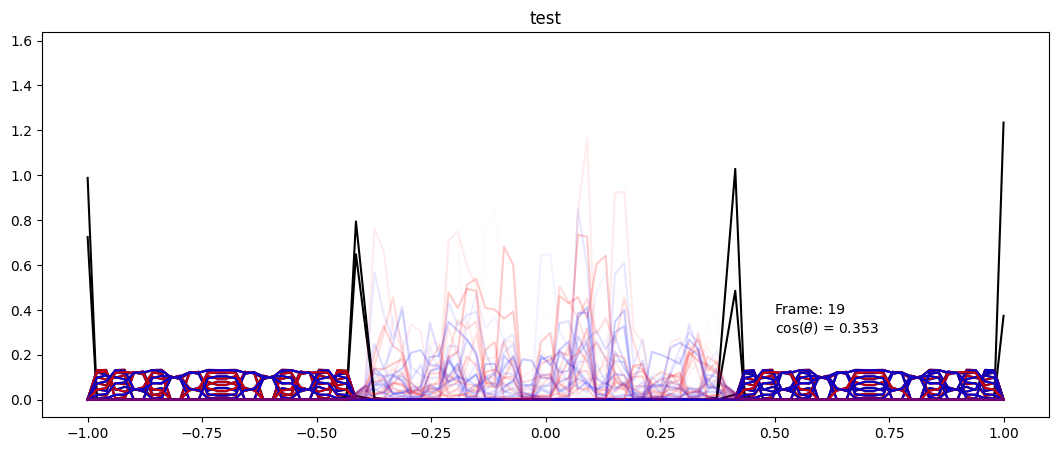

In [10]:
def run_field_change(title, duration=1000):

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(13, 5)
    ax1.set_title(title)

    # Initial state
    n, g, g0 = setup_system()
    H0 = f.jordan_weigner(2, g0)
    H = f.jordan_weigner(2, g)
    U = f.U(H)

    x = np.linspace(-1, 1, len(H0[0]))
    #gline, = ax1.plot(x, g0 / 10, 'black')
    e_values, e_states = np.linalg.eig(H0)
    e_states = e_states.T
    e_values, e_states = zip(*sorted(zip(e_values, e_states), key=lambda e: e[0] ** 2))
    e_states = np.array(e_states)
    dt = 1 / fps

    plots = [None for _ in range(n * 2)]
    for i in range(2 * n):
        plots[i] = ax1.plot(x, np.absolute(f.project_maj(e_states[i]) ** 2), c = cmap((e_values[i] - min(e_values)) / (max(e_values) - min(e_values))))[0]
        #plots[2 * i] = ax1.plot(x, np.absolute(f.project_phs_minus(e_states[i]) ** 2), c = cmap((e_values[i] - min(e_values)) / (max(e_values) - min(e_values))))[0]
        #plots[2 * i + 1] = ax1.plot(x, np.absolute(f.project_phs_plus(e_states[i]) ** 2), c = cmap((e_values[i] - min(e_values)) / (max(e_values) - min(e_values))))[0]

    frame_text = ax1.text(0.5, 0.3, "0")

    def init(): return tuple(plots)

    def animate(frame):
        t = frame * dt
        Ut = U(t)
        states = e_states @ Ut.T
        for i in range(2 * n):
            plots[i].set_data(x, np.absolute(f.project_maj(states[i]) ** 2))
        locshmidt_amp = np.absolute(np.linalg.det((e_states@Ut@e_states.T)[:n,:n]))**2
        print(f"{frame}")
        frame_text.set_text(f"Frame: {frame}\ncos($\\theta$) = {locshmidt_amp:.3f}")
        return tuple(plots)
    
    anim = FuncAnimation(fig, animate, init_func=init,
                        frames = duration, interval = 30, blit = True)
    
    anim.save(f"simulations/{title}.mp4", writer=FFwriter)
run_field_change("test", 20)

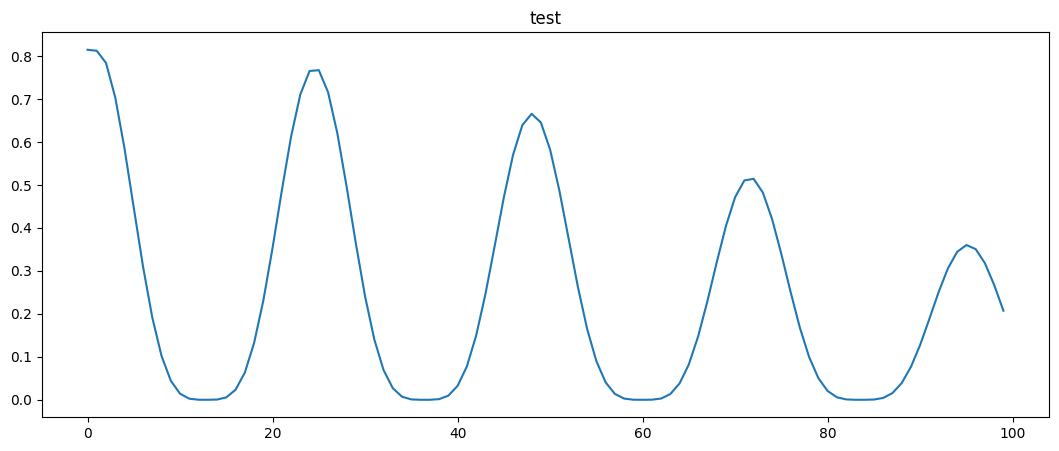

In [9]:
def run_field_change(title, duration=1000):

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(13, 5)
    ax1.set_title(title)

    # Initial state
    n, g, g0 = setup_system()
    H0 = f.jordan_weigner(2, g0)
    H = f.jordan_weigner(2, g)
    U = f.U(H)

    x = np.linspace(-1, 1, len(H0[0]) // 2)
    e_values, e_states = np.linalg.eig(H0)
    e_states = e_states.T
    e_values, e_states = zip(*sorted(zip(e_values, e_states), key=lambda e: e[0] ** 2))
    e_states = np.array(e_states)
    dt = 1 / fps

    locshmidt_amp = []
    Ut = np.eye(2 * n)
    for i in range(duration):
        locshmidt_amp.append(np.absolute(np.linalg.det((e_states@Ut@e_states.T)[:n,:n]))**2)
        t = i * dt
        Ut = U(t)
    
    plt.plot(locshmidt_amp)
run_field_change("test", 100)